# BirdWatch EDA and Data Preparation


## Author: Rosemarie Martienssen


***

### Table of contents
- [Part 0: Import required Python packages and import raw data](#Part-0)

- [Part 1: Data cleaning](#Part-1)

- [Part 2: Basic EDA](#Part-2)

### Part 0: Import required Python packages and import raw data <a class = "anchor" id = "Part-0"></a>

In [1]:
# Displaying full width Notebook

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [77]:
#import packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

#from scipy import stats
#from scipy.stats import norm #used for plotting
#import statsmodels.api as sm

In [3]:
#Import bird feeder data into PANDAS Dataframe

df_raw = pd.read_csv("../data/raw/PFW_all_2021_2023_June2023_Public.csv") 

In [4]:
#Import the table containing species data into a PANDAS Dataframe

df_species = pd.read_csv("../data/raw/PFW_spp_translation_table_May2023.csv") 

In [5]:
#Import the table containing location data into a PANDAS Dataframe

df_location = pd.read_csv("../data/raw/PFW_count_site_data_public_June2023.csv") 

C:\Users\rmart\AppData\Local\Temp\ipykernel_33764\2875746371.py:3: DtypeWarning: Columns (9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_location = pd.read_csv("../data/raw/PFW_count_site_data_public_June2023.csv")


### Part 1: Data cleaning <a class = "anchor" id = "Part-1"></a>

#### Main Birdfeeder Dataset (df_raw)

In [6]:
#Checking the dimension of the data

df_raw.shape

(8394814, 24)

In [7]:
#First look at the data

df_raw.head()

,LOC_ID,LATITUDE,LONGITUDE,SUBNATIONAL1_CODE,ENTRY_TECHNIQUE,SUB_ID,OBS_ID,Month,Day,Year,...,PLUS_CODE,VALID,REVIEWED,DAY1_AM,DAY1_PM,DAY2_AM,DAY2_PM,EFFORT_HRS_ATLEAST,SNOW_DEP_ATLEAST,Data_Entry_Method
0,L100032,45.132361,-93.130328,US-MN,PointMaker1.0_2,S100892478,OBS1320317836,1,15,2022,...,NaN,1.0,0.0,1,0,1,1,1.001,5.0,PFW Web 4.1.5
1,L100032,45.132361,-93.130328,US-MN,PointMaker1.0_2,S100892478,OBS1320317837,1,15,2022,...,NaN,1.0,0.0,1,0,1,1,1.001,5.0,PFW Web 4.1.5
2,L100032,45.132361,-93.130328,US-MN,PointMaker1.0_2,S100892478,OBS1320317838,1,15,2022,...,NaN,1.0,0.0,1,0,1,1,1.001,5.0,PFW Web 4.1.5
3,L100032,45.132361,-93.130328,US-MN,PointMaker1.0_2,S100892478,OBS1320317839,1,15,2022,...,NaN,1.0,0.0,1,0,1,1,1.001,5.0,PFW Web 4.1.5
4,L100032,45.132361,-93.130328,US-MN,PointMaker1.0_2,S100892478,OBS1320317840,1,15,2022,...,NaN,1.0,0.0,1,0,1,1,1.001,5.0,PFW Web 4.1.5


In [8]:
#Check the data types of the columns

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8394814 entries, 0 to 8394813
Data columns (total 24 columns):
 #   Column              Dtype  
---  ------              -----  
 0   LOC_ID              object 
 1   LATITUDE            float64
 2   LONGITUDE           float64
 3   SUBNATIONAL1_CODE   object 
 4   ENTRY_TECHNIQUE     object 
 5   SUB_ID              object 
 6   OBS_ID              object 
 7   Month               int64  
 8   Day                 int64  
 9   Year                int64  
 10  PROJ_PERIOD_ID      object 
 11  SPECIES_CODE        object 
 12  alt_full_spp_code   object 
 13  HOW_MANY            float64
 14  PLUS_CODE           float64
 15  VALID               float64
 16  REVIEWED            float64
 17  DAY1_AM             int64  
 18  DAY1_PM             int64  
 19  DAY2_AM             int64  
 20  DAY2_PM             int64  
 21  EFFORT_HRS_ATLEAST  float64
 22  SNOW_DEP_ATLEAST    float64
 23  Data_Entry_Method   object 
dtypes: float64(8), int64(7),

In [9]:
#Check for the number of na values in each column

df_raw.isna().sum()

LOC_ID                      0
LATITUDE                    0
LONGITUDE                   0
SUBNATIONAL1_CODE           0
ENTRY_TECHNIQUE        255951
SUB_ID                      0
OBS_ID                   7893
Month                       0
Day                         0
Year                        0
PROJ_PERIOD_ID              0
SPECIES_CODE                0
alt_full_spp_code     8346300
HOW_MANY                 7893
PLUS_CODE             8394814
VALID                    7893
REVIEWED                 7893
DAY1_AM                     0
DAY1_PM                     0
DAY2_AM                     0
DAY2_PM                     0
EFFORT_HRS_ATLEAST      14557
SNOW_DEP_ATLEAST       782968
Data_Entry_Method           0
dtype: int64

A lot of columns have null values. We will look at each one of them.

In [10]:
#Check the values in the ENTRY_TECHNIQUE column and how many times they occur

df_raw["ENTRY_TECHNIQUE"].value_counts() 

ENTRY_TECHNIQUE
/GOOGLE_MAP/ZOOM:15                          3743240
/GOOGLE_MAP/ZOOM:18                          1261994
POSTCODE LAT/LONG LOOKUP                      634934
ESRI_WEBSERVICE_STREET                        565609
PointMaker1.0_2                               298989
                                              ...   
otherMicrosoft Streets and Trips                  91
LocCreateAPI                                      91
otherPFW Mapping Tool                             63
ESRI_WEBSERVICE_STREET/GOOGLE_MAP/ZOOM:-4          9
othertowns.USA.org                                 1
Name: count, Length: 116, dtype: int64

The information contained in this column is not fundamental to the goal of this project. Let's remove the column entirely. We can save the data in a new dataframe to leave the raw data untouched

In [11]:
#Drop the values in the ENTRY_TECHNIQUE column and how many times they occur

df_birdfeeder = df_raw.drop('ENTRY_TECHNIQUE', axis=1, inplace=False)
df_birdfeeder.shape 

(8394814, 23)

***

In [12]:
#Look at the null values again

df_birdfeeder.isna().sum() 

LOC_ID                      0
LATITUDE                    0
LONGITUDE                   0
SUBNATIONAL1_CODE           0
SUB_ID                      0
OBS_ID                   7893
Month                       0
Day                         0
Year                        0
PROJ_PERIOD_ID              0
SPECIES_CODE                0
alt_full_spp_code     8346300
HOW_MANY                 7893
PLUS_CODE             8394814
VALID                    7893
REVIEWED                 7893
DAY1_AM                     0
DAY1_PM                     0
DAY2_AM                     0
DAY2_PM                     0
EFFORT_HRS_ATLEAST      14557
SNOW_DEP_ATLEAST       782968
Data_Entry_Method           0
dtype: int64

The OBS_ID column is the "Unique identifier for each observation of a species", according to the data dictionary. Interestingly the number of NA values here coincides with the number of na values in some other columns

In [13]:
#Get a filtered dataframe containing all the rows that have null values in the OBS_ID column

temp_df = df_birdfeeder[df_birdfeeder['OBS_ID'].isna()]

In [14]:
temp_df.shape #Sanity Check

(7893, 23)

In [15]:
#Check the na values in the newly created dataframe

temp_df.isna().sum()

LOC_ID                   0
LATITUDE                 0
LONGITUDE                0
SUBNATIONAL1_CODE        0
SUB_ID                   0
OBS_ID                7893
Month                    0
Day                      0
Year                     0
PROJ_PERIOD_ID           0
SPECIES_CODE             0
alt_full_spp_code     7893
HOW_MANY              7893
PLUS_CODE             7893
VALID                 7893
REVIEWED              7893
DAY1_AM                  0
DAY1_PM                  0
DAY2_AM                  0
DAY2_PM                  0
EFFORT_HRS_ATLEAST     388
SNOW_DEP_ATLEAST      1510
Data_Entry_Method        0
dtype: int64

As suspected, there is data missing across different columns in the selected rows. Given the size of the dataframe, we can simply remove these.

In [16]:
#Replace the dataframe by the version without null values in the OBS_ID column

df_birdfeeder = df_birdfeeder.dropna(subset=['OBS_ID'])

In [17]:
df_birdfeeder.shape #Sanity Check

(8386921, 23)

***

In [18]:
#Check the null values again

df_birdfeeder.isna().sum()

LOC_ID                      0
LATITUDE                    0
LONGITUDE                   0
SUBNATIONAL1_CODE           0
SUB_ID                      0
OBS_ID                      0
Month                       0
Day                         0
Year                        0
PROJ_PERIOD_ID              0
SPECIES_CODE                0
alt_full_spp_code     8338407
HOW_MANY                    0
PLUS_CODE             8386921
VALID                       0
REVIEWED                    0
DAY1_AM                     0
DAY1_PM                     0
DAY2_AM                     0
DAY2_PM                     0
EFFORT_HRS_ATLEAST      14169
SNOW_DEP_ATLEAST       781458
Data_Entry_Method           0
dtype: int64

Focusing on the "alt_full_spp_code" column, this is the description from the data dictionary: 

This column enables someone to "roll up" information on subspecies and recognizable forms into the species code of the full species instead of the code for the recognizable form. The species code values for the subspecies/forms are still the primary information stored in the column SPECIES_CODE, but the alternate code for the full species is available in the column immediately to its right.

In [19]:
#Check the values of the column "alt_full_spp_code" and how many times they occur

df_birdfeeder["alt_full_spp_code"].value_counts() 

alt_full_spp_code
rocpig     23521
daejun     16679
norfli      2757
yerwar      1400
mallar3     1137
musduc       597
foxspa       497
reshaw       402
grbher3      382
rethaw       184
norcar       179
greegr       142
rewbla        99
amekes        68
monpar        61
houwre        61
y00678        55
merlin        45
eastow        42
hergul        40
palwar        37
sancra        31
orcwar        23
turvul        11
osprey         9
y00475         9
sonspa         8
savspa         8
herthr         7
cangoo         5
easmea         4
amerob         3
commer         3
comcan         2
nrwswa         1
compea         1
purmar         1
nopowl         1
whcspa         1
wlswar         1
Name: count, dtype: int64

Leaving the  "alt_full_spp_code" column as it is for the moment, as I am not sure yet how (or if) I will use it. At the moment, about 99% of values in the columns are missing, but it seems like it was meant to be populated during analysis (?)




Moving on to the "plus-code" column, the data dictionary says the following: 

"Data field used on historic paper data forms (no longer being populated) ...." 
It seems safe to simply remove the column.

In [20]:
#Drop the "plus_code" column from the df

df_birdfeeder = df_birdfeeder.drop('PLUS_CODE', axis=1, inplace=False) 

In [21]:
df_birdfeeder.shape #Sanity Check

(8386921, 22)

***

In [22]:
#Check the null values again

df_birdfeeder.isna().sum()

LOC_ID                      0
LATITUDE                    0
LONGITUDE                   0
SUBNATIONAL1_CODE           0
SUB_ID                      0
OBS_ID                      0
Month                       0
Day                         0
Year                        0
PROJ_PERIOD_ID              0
SPECIES_CODE                0
alt_full_spp_code     8338407
HOW_MANY                    0
VALID                       0
REVIEWED                    0
DAY1_AM                     0
DAY1_PM                     0
DAY2_AM                     0
DAY2_PM                     0
EFFORT_HRS_ATLEAST      14169
SNOW_DEP_ATLEAST       781458
Data_Entry_Method           0
dtype: int64

The EFFORT_HRS_ATLEAST column will not be of interest in this project and can also be removed

In [23]:
#Drop the 'EFFORT_HRS_ATLEAST' column from the dataset and check the size of the dataset

df_birdfeeder = df_birdfeeder.drop('EFFORT_HRS_ATLEAST', axis=1, inplace=False) 
df_birdfeeder.shape

(8386921, 21)

Now the last column left to examine is about the snow depth.

In [24]:
#Check the values of the "SNOW_DEP_ATLEAST" column to decide what to do with it

df_birdfeeder["SNOW_DEP_ATLEAST"].value_counts()

SNOW_DEP_ATLEAST
0.000     4992865
0.001     1038294
5.000      879946
15.001     694358
Name: count, dtype: int64

In [25]:
#Checking the percentage of missing values in the "SNOW_DEP_ATLEAST" column

781458/df_birdfeeder.shape[0] * 100 

9.317579121110118

I am not sure at the moment how and if I will be using this column, so leaving it for now.
***

In [26]:
#Check the null values in the dataframe again

df_birdfeeder.isna().sum()

LOC_ID                     0
LATITUDE                   0
LONGITUDE                  0
SUBNATIONAL1_CODE          0
SUB_ID                     0
OBS_ID                     0
Month                      0
Day                        0
Year                       0
PROJ_PERIOD_ID             0
SPECIES_CODE               0
alt_full_spp_code    8338407
HOW_MANY                   0
VALID                      0
REVIEWED                   0
DAY1_AM                    0
DAY1_PM                    0
DAY2_AM                    0
DAY2_PM                    0
SNOW_DEP_ATLEAST      781458
Data_Entry_Method          0
dtype: int64

***
***

Done with the null values (for now!) Moving on to check for any duplicate rows:

In [27]:
#Display duplicate rows in the dataframe

df_birdfeeder[df_birdfeeder.duplicated()]

,LOC_ID,LATITUDE,LONGITUDE,SUBNATIONAL1_CODE,SUB_ID,OBS_ID,Month,Day,Year,PROJ_PERIOD_ID,...,alt_full_spp_code,HOW_MANY,VALID,REVIEWED,DAY1_AM,DAY1_PM,DAY2_AM,DAY2_PM,SNOW_DEP_ATLEAST,Data_Entry_Method


Seems like we have no duplicate rows!

***
***
***

#### Species Dataset (df_species)

In [28]:
#Check the dimentions of the df_species dataset

df_species.shape

(1090, 7)

In [29]:
#Display the first few lines of data

df_species.head()

,species_code,alt_full_spp_code,n_locations,scientific_name,american_english_name,taxonomy_version,taxonomic_sort_order
0,grerhe1,NaN,1,Rhea americana,Greater Rhea,2022,10
1,gretin1,NaN,3,Tinamus major,Great Tinamou,2022,42
2,wfwduc1,NaN,1,Dendrocygna viduata,White-faced Whistling-Duck,2022,228
3,bbwduc,NaN,105,Dendrocygna autumnalis,Black-bellied Whistling-Duck,2022,230
4,fuwduc,NaN,2,Dendrocygna bicolor,Fulvous Whistling-Duck,2022,235


In [30]:
#Check the datatypes of the columns

df_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   species_code           1090 non-null   object
 1   alt_full_spp_code      171 non-null    object
 2   n_locations            1090 non-null   int64 
 3   scientific_name        1090 non-null   object
 4   american_english_name  1090 non-null   object
 5   taxonomy_version       1090 non-null   int64 
 6   taxonomic_sort_order   1090 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 59.7+ KB


From this table, I will only really be using the names so we can get rid of most of the columns.

In [31]:
#Overwrite the dataframe by just extracting the three columns we will use and then check the dimensions of the new df

df_species = df_species[["species_code", 'scientific_name', 'american_english_name']]
df_species.shape #Sanity Check

(1090, 3)

In [32]:
#Display the first few rows of the (modified) dataframe

df_species.head()

,species_code,scientific_name,american_english_name
0,grerhe1,Rhea americana,Greater Rhea
1,gretin1,Tinamus major,Great Tinamou
2,wfwduc1,Dendrocygna viduata,White-faced Whistling-Duck
3,bbwduc,Dendrocygna autumnalis,Black-bellied Whistling-Duck
4,fuwduc,Dendrocygna bicolor,Fulvous Whistling-Duck


In [33]:
#Check for null values in the species dataset

df_species.isna().sum() 

species_code             0
scientific_name          0
american_english_name    0
dtype: int64

In [34]:
#Check for duplicates in the species dataset

df_species[df_species.duplicated()] 

,species_code,scientific_name,american_english_name


There are no null values and no duplicates in the species table, so we can move on to the next table

***
***
***

#### Location Dataset (df_location)

In [35]:
#Check the dimentsions of the location dataset

df_location.shape

(284356, 66)

In [36]:
#Check the datatypes of the columns in the location table

df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284356 entries, 0 to 284355
Data columns (total 66 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   loc_id                        284356 non-null  object 
 1   latitude                      284356 non-null  float64
 2   longitude                     284356 non-null  float64
 3   proj_period_id                284356 non-null  object 
 4   yard_type_pavement            215401 non-null  float64
 5   yard_type_garden              215996 non-null  float64
 6   yard_type_landsca             221260 non-null  float64
 7   yard_type_woods               216650 non-null  float64
 8   yard_type_desert              215496 non-null  float64
 9   hab_dcid_woods                251218 non-null  object 
 10  hab_evgr_woods                236887 non-null  object 
 11  hab_mixed_woods               259430 non-null  object 
 12  hab_orchard                   221206 non-nul

In [37]:
#Look at the first few rows in the location table

df_location.head()

,loc_id,latitude,longitude,proj_period_id,yard_type_pavement,yard_type_garden,yard_type_landsca,yard_type_woods,yard_type_desert,hab_dcid_woods,...,numfeeders_water,numfeeders_thistle,numfeeders_fruit,numfeeders_hopper,numfeeders_tube,numfeeders_other,population_atleast,count_area_size_sq_m_atleast,create_dt,supp_food
0,L100016,48.823847,-124.040237,PFW_2005,0.0,0.0,1.0,0.0,0.0,1,...,1.0,0.0,0.0,NaN,NaN,NaN,1.0,1.01,NaN,NaN
1,L100016,48.823847,-124.040237,PFW_2004,0.0,0.0,1.0,0.0,0.0,1,...,1.0,0.0,0.0,NaN,NaN,NaN,1.0,1.01,NaN,NaN
2,L100016,48.823847,-124.040237,PFW_2006,0.0,0.0,1.0,0.0,0.0,1,...,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.01,NaN,NaN
3,L100016,48.823847,-124.040237,PFW_2003,0.0,0.0,1.0,0.0,0.0,1,...,1.0,0.0,0.0,NaN,NaN,NaN,1.0,1.01,NaN,NaN
4,L100016,48.823847,-124.040237,PFW_2007,0.0,0.0,1.0,0.0,0.0,1,...,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.01,NaN,NaN


In [38]:
#Calculate the number of null values in each column of the location table

df_location.isna().sum()

loc_id                               0
latitude                             0
longitude                            0
proj_period_id                       0
yard_type_pavement               68955
                                 ...  
numfeeders_other                164375
population_atleast               29670
count_area_size_sq_m_atleast     55691
create_dt                       125448
supp_food                       255477
Length: 66, dtype: int64

There are a lot of null values in this table. Will leave it as it is at the moment as I am not yet sure which columns will be used and how.

***
***
***

We will mainly be working with the df_birdfeeder and the df_species table. Depending on the analysis, it may be interesting to also add the location table later on.
Both the birdfeeder and the species table contain a column for the species code. We can use this column to merge the two tables into a single one

In [39]:
#Join the df_birdfeeder and the df_species tables into a new dataframe

df_main = pd.merge(df_birdfeeder, df_species, left_on='SPECIES_CODE', right_on = "species_code")

In [40]:
#Check the dimensions of the newly created dataframe

df_main.shape

(8386921, 24)

In [41]:
#Display the first rows of datas of the new dataframe

df_main.head()

,LOC_ID,LATITUDE,LONGITUDE,SUBNATIONAL1_CODE,SUB_ID,OBS_ID,Month,Day,Year,PROJ_PERIOD_ID,...,REVIEWED,DAY1_AM,DAY1_PM,DAY2_AM,DAY2_PM,SNOW_DEP_ATLEAST,Data_Entry_Method,species_code,scientific_name,american_english_name
0,L100032,45.132361,-93.130328,US-MN,S100892478,OBS1320317836,1,15,2022,PFW_2022,...,0.0,1,0,1,1,5.000,PFW Web 4.1.5,brdowl,Strix varia,Barred Owl
1,L100032,45.132361,-93.130328,US-MN,S101351978,OBS1326112211,1,22,2022,PFW_2022,...,0.0,1,1,1,1,5.000,PFW Web 4.1.5,brdowl,Strix varia,Barred Owl
2,L100032,45.132361,-93.130328,US-MN,S102244797,OBS1337003050,2,5,2022,PFW_2022,...,0.0,1,1,1,1,5.000,PFW Web 4.1.5,brdowl,Strix varia,Barred Owl
3,L100032,45.132361,-93.130328,US-MN,S103304290,OBS1347942575,2,19,2022,PFW_2022,...,0.0,1,1,1,1,15.001,PFW Web 4.1.5,brdowl,Strix varia,Barred Owl
4,L100032,45.132361,-93.130328,US-MN,S103936569,OBS1354973456,2,26,2022,PFW_2022,...,0.0,1,1,1,1,15.001,PFW Web 4.1.5,brdowl,Strix varia,Barred Owl


In [42]:
#Confirm if the join worked correctly by displaying extracting just a few columns and then displaying the last rows of the game

df_temp = (df_main[['SPECIES_CODE', 'species_code', 'scientific_name', 'american_english_name']])
df_temp.tail(20)

,SPECIES_CODE,species_code,scientific_name,american_english_name
8386901,reblei,reblei,Leiothrix lutea,Red-billed Leiothrix
8386902,reblei,reblei,Leiothrix lutea,Red-billed Leiothrix
8386903,reblei,reblei,Leiothrix lutea,Red-billed Leiothrix
8386904,reblei,reblei,Leiothrix lutea,Red-billed Leiothrix
8386905,reblei,reblei,Leiothrix lutea,Red-billed Leiothrix
8386906,reblei,reblei,Leiothrix lutea,Red-billed Leiothrix
8386907,reblei,reblei,Leiothrix lutea,Red-billed Leiothrix
8386908,reblei,reblei,Leiothrix lutea,Red-billed Leiothrix
8386909,reblei,reblei,Leiothrix lutea,Red-billed Leiothrix
8386910,reblei,reblei,Leiothrix lutea,Red-billed Leiothrix


Assuming the join worked as intended, we do not need the species_code columns anymore

In [43]:
#drop the Species Code column from the first table

df_main = df_main.drop('SPECIES_CODE', axis=1, inplace=False) 

In [44]:
#Drop the Species code column from the second table

df_main = df_main.drop('species_code', axis=1, inplace=False) 

In [45]:
#Sanity Check 

df_main.shape

(8386921, 22)

Let's export this data for other notebooks

In [46]:
#Export the data to a csv file, commented code to not export everytime the kernel is restarted

#df_main.to_csv('feederwatch_cleaned', index=False)

***
***
***
***

### Part 2: Basic EDA <a class = "anchor" id = "Part-2"></a>

Because the Data set is pretty large at the moment, it might make sense to shrink it down or divide into parts to make the analysis a little easier. One candidate for partitioning is the "Subnational1_code" column

In [47]:
#Investigate the values of the "Subnational1_code column"

df_main["SUBNATIONAL1_CODE"].value_counts()

SUBNATIONAL1_CODE
US-NY     694779
CA-ON     680498
US-VA     522188
US-PA     513418
US-MA     343148
           ...  
US-HI        720
PM-          675
CA-NT        321
MN-061        44
CA-NU          1
Name: count, Length: 67, dtype: int64

It looks like each row in this column starts with 2 letters, which represent the country where the data was collected. Let's see how many countries we have

In [48]:
#Display the first two letters of values in the "Subnational1_code" column and count how many times they appear in the data

df_main["SUBNATIONAL1_CODE"].str[:2].value_counts()

SUBNATIONAL1_CODE
US    7219256
CA    1164056
XX       2890
PM        675
MN         44
Name: count, dtype: int64

We can see that the USA and Canada make up most of the data. According to the data dictionary, the "XX" values represent incorrect user inputs. I am not sure what "PM" and "MN" stand for here, but since their numbers are so small, we can just continue by focusing on the USA and Canada.

In [49]:
#Define a dataframe each for the US and for the Canadian data

df_main_US = df_main[df_main["SUBNATIONAL1_CODE"].str[:2] == "US"]
df_main_CA = df_main[df_main["SUBNATIONAL1_CODE"].str[:2] == "CA"]

Now we can start plotting the data!

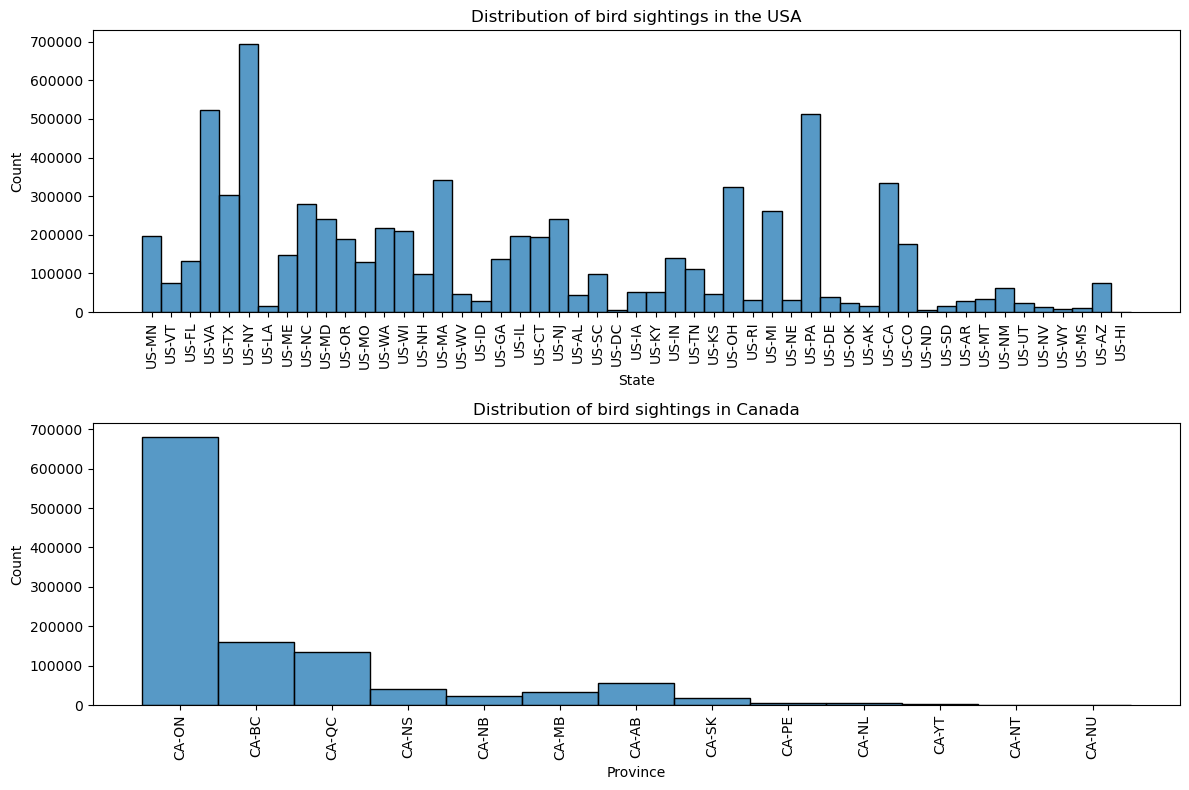

In [50]:
#Plot the two distributions in one diagram

plt.figure

plt.subplots(2,1, figsize = (12,8))

#Create the first subplot
plt.subplot(2,1,1)
plt.title("Distribution of bird sightings in the USA")
sns.histplot(df_main_US["SUBNATIONAL1_CODE"])
plt.xticks(rotation=90)
plt.xlabel("State")


#Create the second subplot
plt.subplot(2,1,2)
plt.title("Distribution of bird sightings in Canada")
sns.histplot(df_main_CA["SUBNATIONAL1_CODE"])
plt.xticks(rotation=90)
plt.xlabel("Province")

#Minimize overlap
plt.tight_layout()

plt.show()

In the USA, most of the values seem to have been recorded from the state of New York. In Canada, Ontario has by far the most value counts, followed by British Columbia.

For Canada, let's see what kind of birds were most often encountered in the different states

<Figure size 640x480 with 0 Axes>

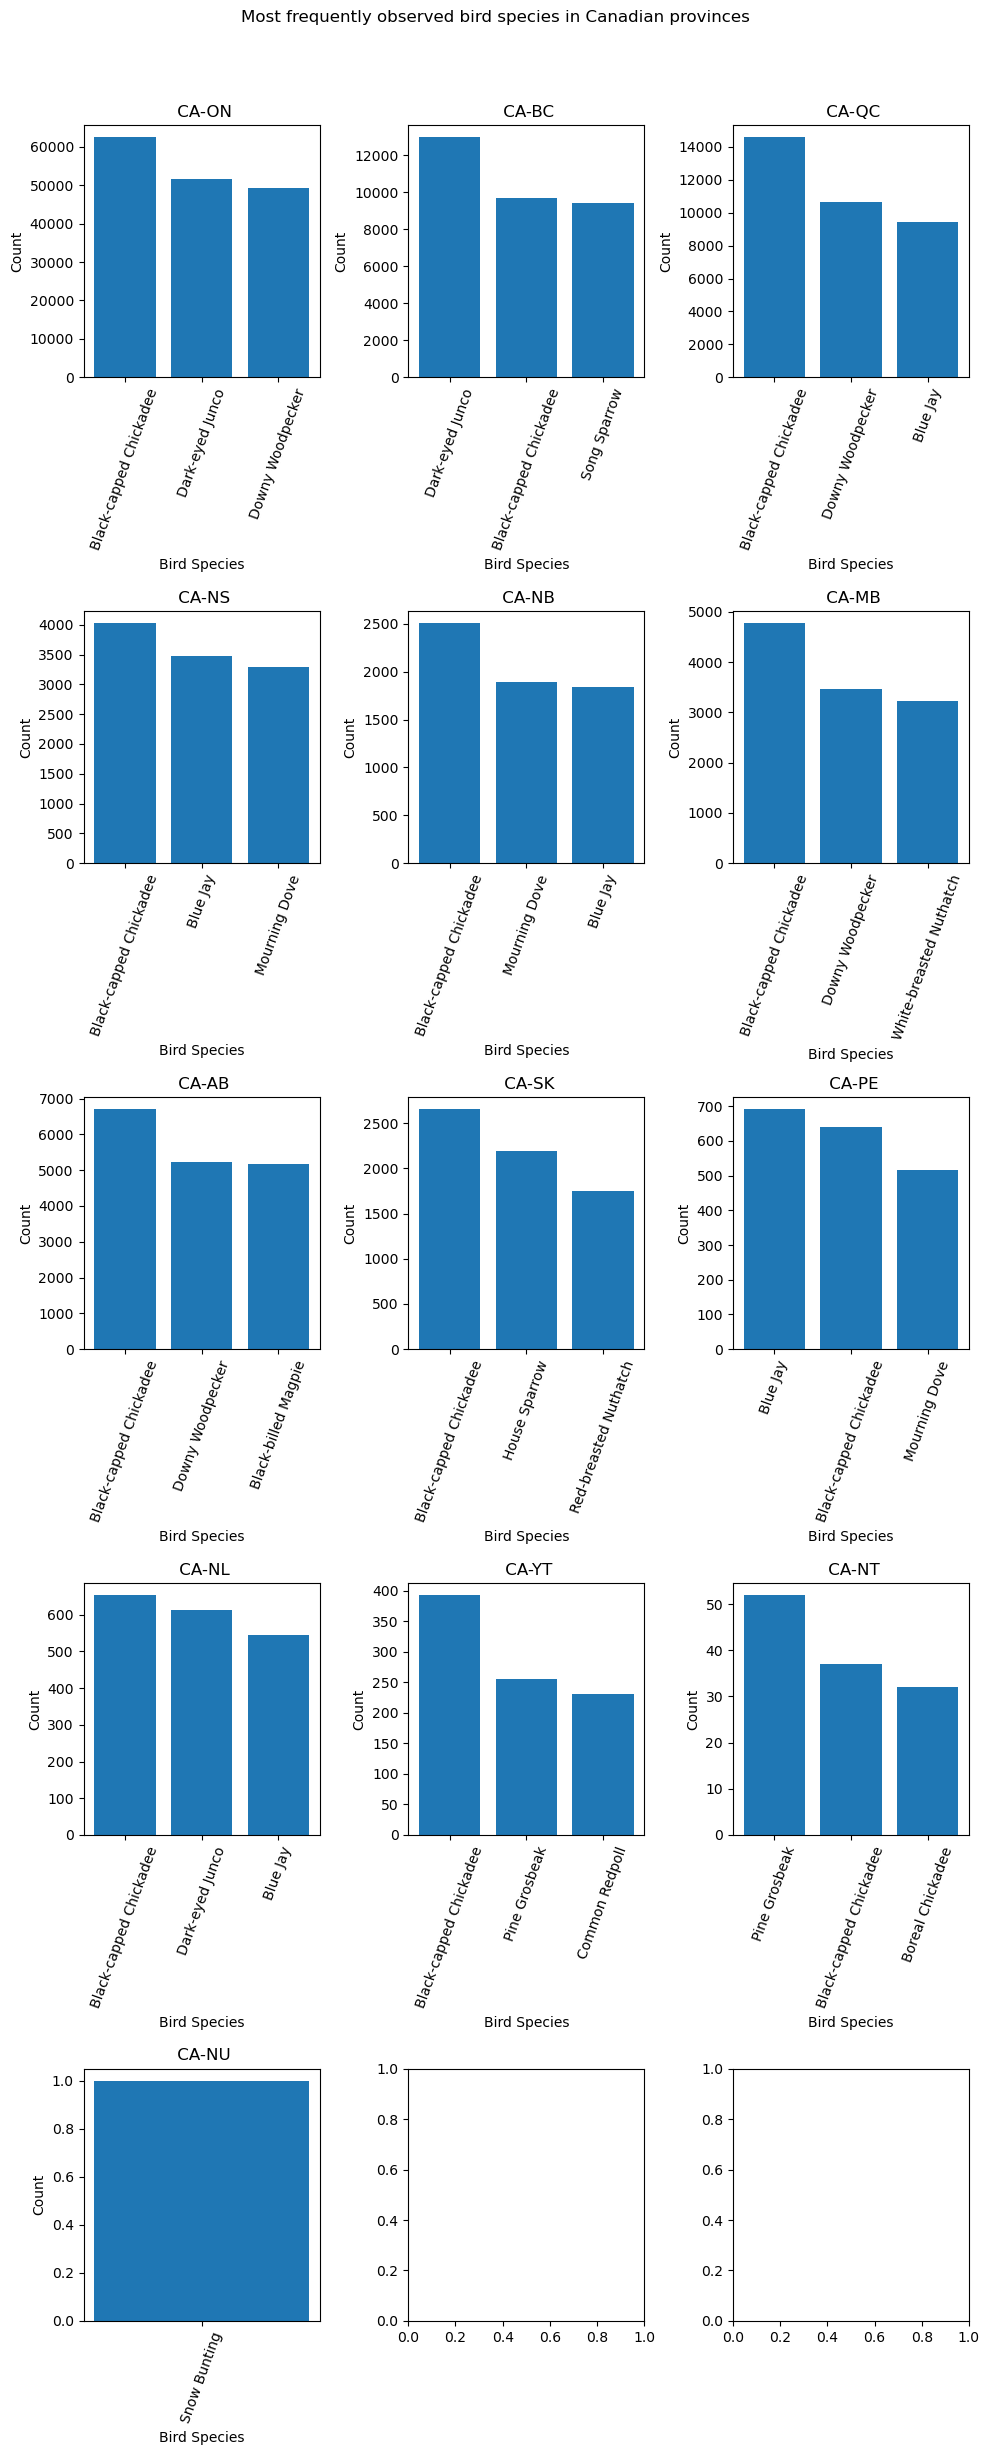

In [51]:
plt.figure()

plt.subplots(5, 3, figsize=(10, 25))


counter = 1

for province in df_main_CA["SUBNATIONAL1_CODE"].unique():
    plt.subplot(5, 3, counter)  # Use the counter variable to specify the subplot position
    df_state = df_main_CA[df_main_CA["SUBNATIONAL1_CODE"] == province]["american_english_name"].value_counts().head(3).sort_values(ascending=False)
    plt.bar(df_state.index, df_state.values)
    plt.title(f" {province}")  # Add a title to each subplot
    plt.xticks(rotation=70) 
    plt.ylabel("Count")
    plt.xlabel("Bird Species")
    counter += 1
    
plt.suptitle("Most frequently observed bird species in Canadian provinces")
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the top parameter to leave space for the suptitle
plt.show()

The top row of the plots show three states that had the highest number of birds. Interestingly, even though there are differences, similar species come up in the top 3 (Black capped Chickadee, Downy Woodpecker).

Going forward, lets keep focusing on the Canadian data.

In [52]:
#Check the most often encountered birds in Canada

df_main_CA["american_english_name"].value_counts().head(3)

american_english_name
Black-capped Chickadee    109084
Dark-eyed Junco            82273
Downy Woodpecker           80338
Name: count, dtype: int64

This result is not surprising after having seen the data in each province. Lets use at the time data provided in the table.

In [53]:
#Print the value counts per year in the data

df_main_CA["Year"].value_counts()

Year
2022    412407
2021    390205
2023    245905
2020    115539
Name: count, dtype: int64

In [54]:
#Print the value counts per month in the data

df_main_CA["Month"].value_counts()

Month
1     219231
3     208677
12    200750
4     189859
2     189597
11    155933
10         9
Name: count, dtype: int64

This result is pretty surprising. There are basically no values for the summer months. Lets look at the months over the years.

In [57]:
#Create a dataframe that groups first by year and then by month and then counts the species per month and year

df_temp = df_main_CA.groupby(['Year'])["Month"].value_counts().reset_index()
df_temp.head(10)

,Year,Month,count
0,2020,12,69252
1,2020,11,46287
2,2021,1,78114
3,2021,3,76995
4,2021,2,67733
5,2021,12,63078
6,2021,4,62071
7,2021,11,42214
8,2022,1,78253
9,2022,3,70313


<Figure size 640x480 with 0 Axes>

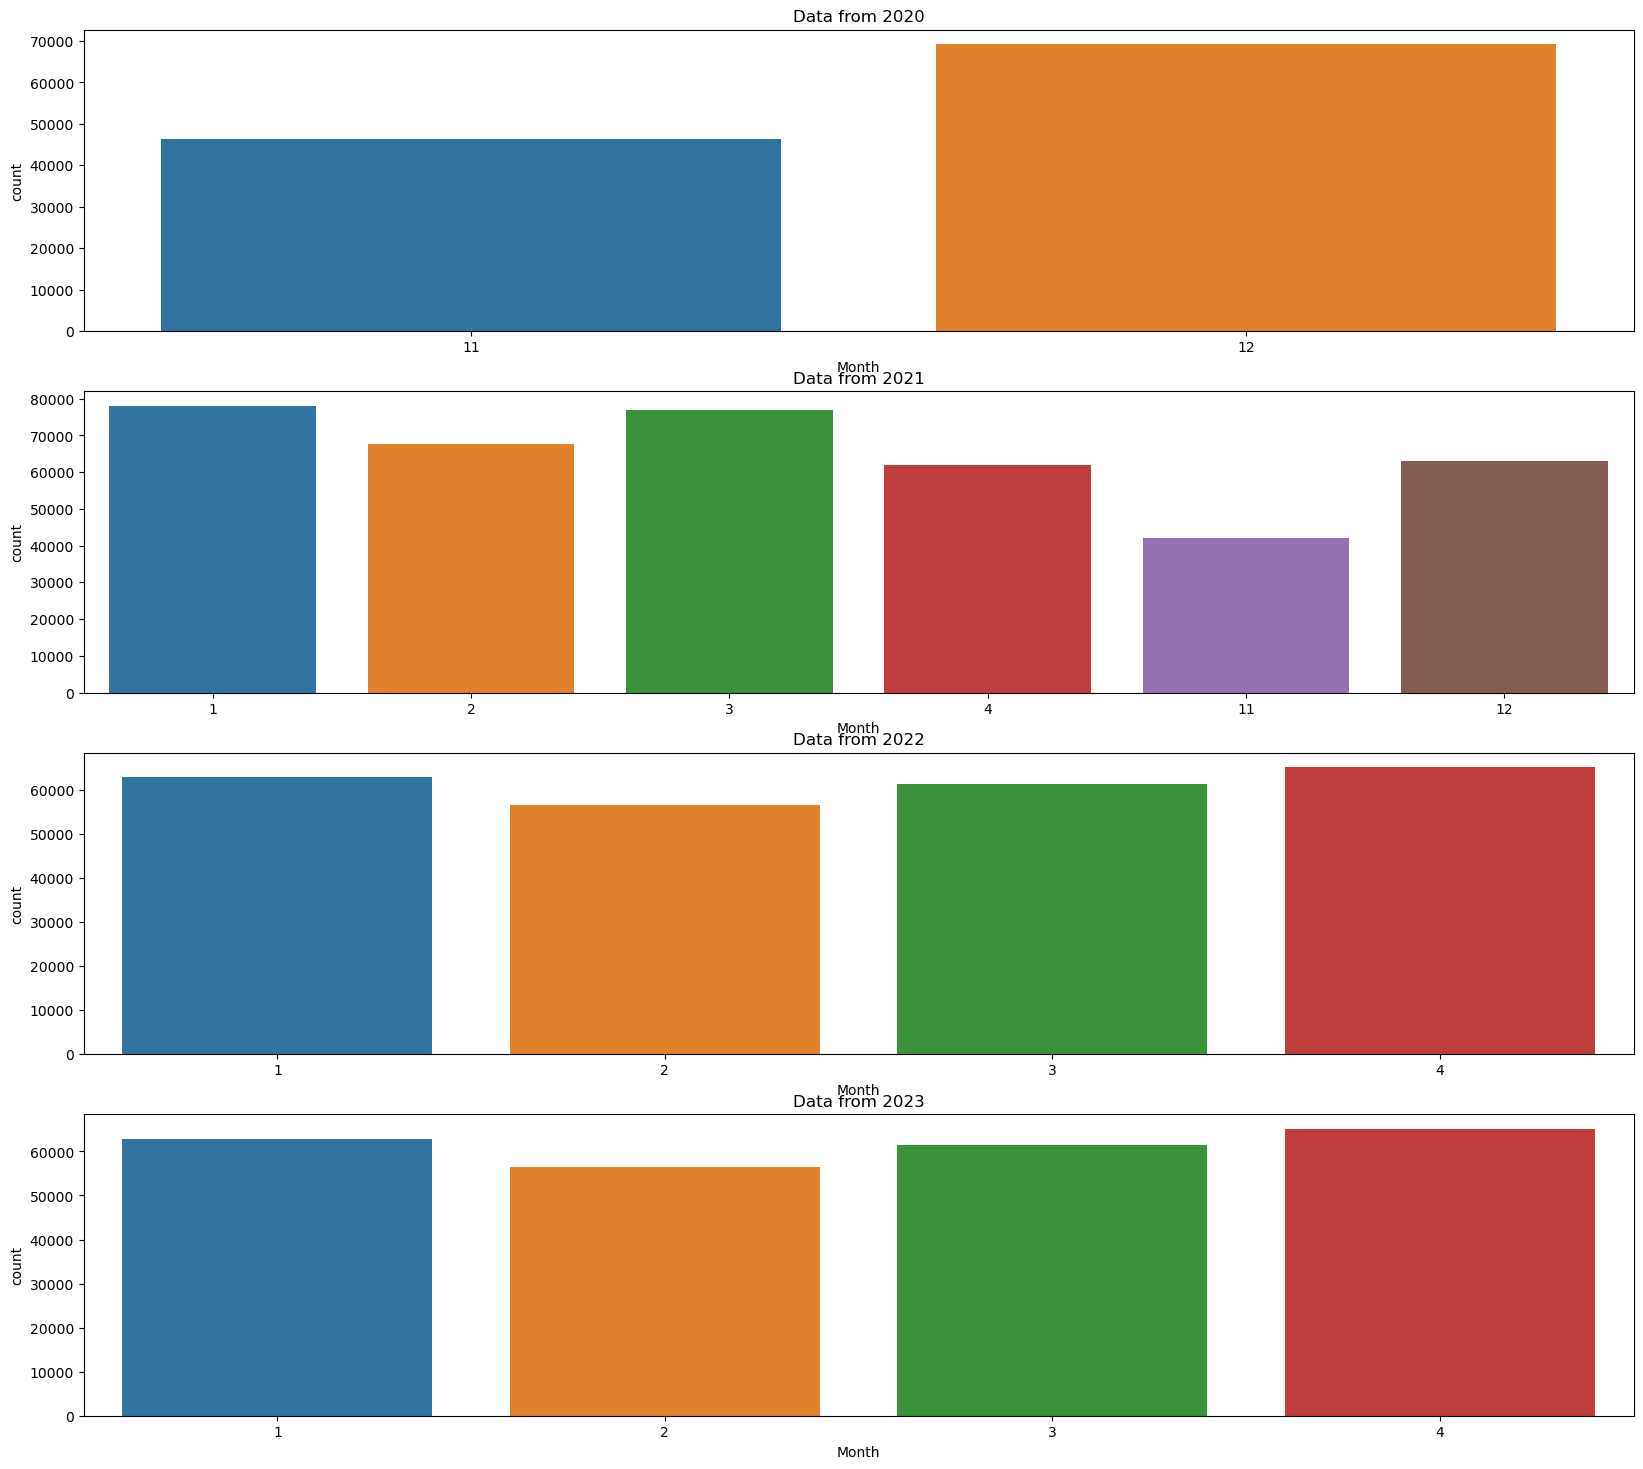

<Figure size 640x480 with 0 Axes>

In [75]:
plt.figure()

plt.subplots(4,1, figsize = (20,18))

plt.subplot(4,1,1)
plt.title("Data from 2020")
sns.barplot(x = "Month", y = "count", data = df_temp[df_temp["Year"] == 2020])


plt.subplot(4,1,2)
plt.title("Data from 2021")
sns.barplot(x = "Month", y = "count", data = df_temp[df_temp["Year"] == 2021])


plt.subplot(4,1,3)
plt.title("Data from 2022")
sns.barplot(x = "Month", y = "count", data = df_temp[df_temp["Year"] == 2023])


plt.subplot(4,1,4)
plt.title("Data from 2023")
sns.barplot(x = "Month", y = "count", data = df_temp[df_temp["Year"] == 2023])

plt.show()

plt.tight_layout()

It does not seem like there are any consistent trends here. This is kind of concerning, as I was hoping to use time series analysis.

***
***
***

### Part 3: Next steps <a class = "anchor" id = "Part-3"></a>

*Some Brainstorming ideas on how to proceed:*
- The datasource also has tables containing data from previous years. By adding these to the analysis, it may get easier to identify trends for time series analysis
- Adding more data would also help make any restrictions to provinces more meaningful. I might look into just analyzing British Columbia, Canada in the beginning
- Explore the Longitude and Latitude columns (after adding the additional data) to identify hot spots and maybe spot some patterns
